<font size="6"> Introduction</font>  

Most application of Machine Learning are based on supervised learning (labels are available); however, there may be vast majority of the available without labels. For example, if you want to develop a Machine Learning algorithm for a manufacturing production line to detect defective items; this is very straightforward. You can write a code automatically read features of each product every day and in a few week you will have a large data set to train your model. But wait, your instances do not have label as defective or non defective (normal)! This means you need human supervision to manually test each each as normal or defective. This will be very costly and tedious task, and only small tests can be applied. Since training set is very small, the performance of your classifier will not be acceptable. In the meantime, the entire process should be started again whenever the company makes any change to the products. It would be grate if a model can be automatically trained without needing human supervision (test).

We talk about the most common unsupervised learning task: dimensionality reduction and clustering in this lecture.

# Dimensionality Reduction

We may have thousands or millions of features for each training instance. This not only makes the training process very slow but also make it harder to find a good solution. This problem is called **curse of dimensionality** which is classified as unsupervised learning. We can remove features to keep the most important ones; however, similar to compress an image that reduces the quality, reducing dimensionality does lead to lose some information. **In the meantime, although the training process will be faster, the performance of your model may be worse due to losing some information. So, first you should train your model without removing dimension. If training is so slow then you can apply dimensionality reduction.**

Dimensionality reduction is also very useful for data visualization; when we have many dimensions, it will be very efficient to reduce dimension to two or three to have a better communication with people who are not data scientist [(Aurélien Géron, 2019)](). 


## Projection

Projection means that for a data with n-columns (features), a subspace with n or fewer columns can be fitted to data, whilst retaining the essence of the original data.

In practice, training instances are unlikely to spread out uniformly across all dimensions (features). Some features are correlated and other features are approximately constant. Thereby, a much lower-dimensional subspace of the high-dimensional space can be fitted to data that all training instances can actually lie within on the surface. This might seem a little confusing. Lets see a simple example below. Left Figure shows a 3D dataset of variables x1, x2, and x3; these variables are correlated with each other. Right Figure shows a 2D subspace fitted to the data that all instances are closed to lie on this plane. This is a lower-dimensional (2D) subspace of the high-dimensional (3D) space

Now if every training instance is projected perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), a new 2D dataset shown is generated in bottom right Figure. It means we have reduced dimension of the dataset from 3D to 2D. New features z1 and z2 are the coordinates of the projections on the plane. The 2D data set shows much better representation of data with clusters and outliers. We can apply this approach to convert high-dimensional data to any lower dimension.

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/Fig9-1.png " alt="drawing" width="950"/>

## Principal Component Analysis (PCA)

The most common dimensionality reduction algorithm is Principal Component Analysis (PCA). As it was shown in Figure above, PCA first identifies the lower-dimensional hyperplane (2D subsurface in Figure above) that lies closest to the data, and then it projects the data onto it. Lets consider a simple simple 2D dataset on the left Figure below. There is one-dimensional
hyperplanes **C1**, **C2**, **C3** fitted to this data set. Right Figures show the result of the projection of this dataset onto each of **C1**, **C2**, **C3** hyperplanes. The projection on the **C1** hyperplane preserves the highest variance while the projection on the **C3** hyperplane has the lowest variance. It is clear that we should choose the axis that preserves the maximum variance, due to losing much less information than the other projections. We can also say that **C1** is the axis that minimizes the mean squared distance between the original dataset and its projection.

<p>&nbsp;</p>
<img src="https://raw.githubusercontent.com/MehdiRezvandehy/Machine-Learning-Course-University-of-Calgary/master/Images/Fig9-2.png " alt="drawing" width="950"/>

### Principal Components

The axis that accounts for the largest amount of variance in the training set is identified by PCA, which is **C1** in Figure above. The remaining largest amount of variance is achieved by the orthogonal hyperplane **C3** to **C1**. In case of a higher-dimensional dataset, a third axis orthogonal to both previous axes, and a fourth, a fifth ... in the dataset would be found by PCA. The $i^{th}$ *principal component (PC)* is the unit vector for $i^{th}$ axis. For example in Figure above, **C1** is the $1^{th}$ PC, **C2** is the $2^{nd}$ PC, and the $3^{rd}$ PC would be orthogonal to the plane (pointing down or up). The question is how we can find the principal component of a training set. The training set matrix X can be decomposed into the matrix multiplication of three matrices $UCV^{T}$ that is called **Singular Value Decomposition (SVD)**; where V has all the principal components that we need [(Aurélien Géron, 2019)]().
 
Lets generate three synthetic variables that are correlated with each other with the following codes: 

In [1]:
import numpy as np
import scipy.linalg

def Corr_rand(corr,seed,nsim,nvar):
    """ This is a function that generates correlated Gaussian 
    model based on a correlation matrix"""
    
    X = np.zeros((nsim, nvar))
    np.random.seed(seed)
    matrix=corr
    L=scipy.linalg.cholesky(matrix, lower=True, overwrite_a=True)
    mu=0; sigma=1; nvar=len(matrix)
    w=np.zeros((nvar,nsim)) 
    for i in range (nvar):
        for j in range(nsim):
            Dist = np.random.normal(mu, sigma, nsim)
            w[i,:]=Dist
            
    for i in range(nsim):
        tmp=(np.matmul(L,w[:,i]))
        X[i, :]=tmp            
    return X      

In [2]:
# A correlation matrix
corr=np.zeros((3,3))
corr[0,0]=corr[1,1]=corr[2,2]=1
corr[0,1]=corr[1,0]=0.6
corr[0,2]=corr[2,0]=0.82
corr[1,2]=corr[2,1]=0.5   
    
# Make a synthetic 30 correlated data    
Syn_Data=Corr_rand(corr,seed=20,nsim=30,nvar=3)

The following code plots the correlation matrix of the variables:

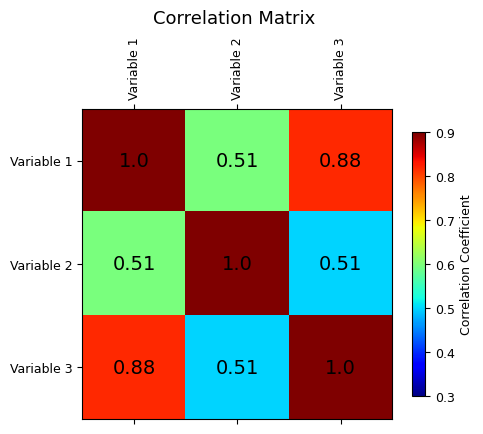

In [3]:
import matplotlib 
import pylab as plt

# Plot covariance matrix between lag distances
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')

columns=['Variable ' +str(i+1) for i in range(3)]
cax =ax.matshow(corr, cmap='jet', interpolation='nearest',vmin=0.3, vmax=0.9)
fig.colorbar(cax,shrink=0.7,label='Correlation Coefficient')
plt.title('Correlation Matrix ', fontsize=13,y=1.25)
for i in range(3):
    for j in range(3):
        c = np.corrcoef(Syn_Data[:,i],Syn_Data[:,j])
        ax.text(i, j, str(round(c[0,1],2)), va='center', ha='center',fontsize=14)
ax.set_xticks(np.arange(len(columns)))
ax.set_xticklabels(columns,fontsize=9, rotation='vertical')
ax.set_yticks(np.arange(len(columns)))
ax.set_yticklabels(columns,fontsize=9)
plt.show()

Ok now we have synthetic correlated data set. Lets calculate PCA by SVD decomposition. All the principal components of the training set can be calculated by NumPy’s svd() function:

In [4]:
Syn_Data_cntr = Syn_Data - Syn_Data.mean(axis=0) # PCA requires data to have mean=0 (centered)
U, C, V = np.linalg.svd(Syn_Data_cntr)
c1_svd = V.T[:, 0]   # 1st principal component
c2_svd = V.T[:, 1]   # 2nd principal component

print('First Principal Component:',c1_svd)
print('Second Principal Component:',c2_svd)

First Principal Component: [0.59049438 0.45581804 0.66599272]
Second Principal Component: [-0.28976858  0.889947   -0.3521768 ]


### Projection

When all the principal components are identified, the dimensionality of the dataset can be reduced to d dimensions by projecting it onto the hyperplane defined by the first d principal components. Projection will preserve as much variance as possible as we saw before. You can simply project the training set onto the hyperplane by computing the matrix multiplication of the training set matrix by the matrix that defines the first d principal components. See the following code to project the synthetic training set to a 2D dimension:

In [5]:
W2 = V.T[:, :2]     # First two principal component
Syn_Data_2D_svd = Syn_Data_cntr.dot(W2)
Syn_Data_2D_svd[0:5]

array([[-1.57165687,  0.13917659],
       [-0.64543912, -0.20416899],
       [-2.033661  , -0.48961946],
       [ 0.01590008,  0.68340822],
       [ 0.40829431,  0.49185113]])

"Syn_Data_2D" is a 2D data set calculated by PCA from the original 3D data set ("Syn_Data") while preserving as much variance as possible.

## PCA by Scikit-Learn

Scikit-Learn PCA class can simply compute PCA by SVD decomposition. We do not need to center the date set (mean=0) it automatically center the data set.

The code below applies PCA to reduce the dimension of the synthetic dataset "Syn_Data" from 3 to 2 dimensions:

In [8]:
Syn_Data

array([[-8.60869946e-01, -5.62898126e-01, -1.36311391e+00],
       [-8.28440131e-02, -4.48887208e-01, -7.40239858e-01],
       [-9.74544100e-01, -1.33262449e+00, -1.42921826e+00],
       [-2.11432869e-02,  6.43883753e-01, -5.49846570e-01],
       [ 1.68765204e-01,  6.54202962e-01, -1.36102329e-01],
       [ 1.62046930e+00, -2.74143390e-01,  8.75128002e-01],
       [ 4.22076963e-01,  6.64149227e-01,  6.55945514e-01],
       [ 2.61570678e+00,  1.72795068e+00,  2.53420135e+00],
       [-5.65480286e-01, -8.20929189e-01, -6.80262479e-01],
       [-1.65448202e+00, -3.78030619e-01, -2.57610272e+00],
       [ 6.84087983e-01,  1.40194979e+00,  6.79783065e-01],
       [ 7.87758072e-01,  1.08727329e+00,  3.14675148e-01],
       [ 1.28724521e+00,  2.05925748e+00,  5.69140637e-01],
       [-6.47441369e-01, -2.90280595e-01, -3.81261586e-01],
       [ 8.43769871e-01, -2.37770792e-01,  8.64930819e-01],
       [-1.36178058e-01,  2.48624241e-01, -2.96159812e-01],
       [ 4.95269064e-01, -4.82039805e-01

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
Syn_Data_2D = pca.fit_transform(Syn_Data)

c1 = pca.components_.T[:, 0]   # 1st principal component
c2 = pca.components_.T[:, 1]   # 2nd principal component

print('First Principal Component:',c1)
print('Second Principal Component:',c2)

First Principal Component: [0.59049438 0.45581804 0.66599272]
Second Principal Component: [-0.28976858  0.889947   -0.3521768 ]


In [15]:
Syn_Data_2D

array([[-1.57165687,  0.13917659],
       [-0.64543912, -0.20416899],
       [-2.033661  , -0.48961946],
       [ 0.01590008,  0.68340822],
       [ 0.40829431,  0.49185113],
       [ 1.51583243, -1.11111802],
       [ 1.08990526,  0.14836012],
       [ 4.12103594, -0.2020361 ],
       [-1.06007208, -0.41653645],
       [-2.76385611,  0.96084924],
       [ 1.59679974,  0.72064592],
       [ 1.2714219 ,  0.53914272],
       [ 2.17888634,  1.16980461],
       [-0.66745801, -0.02583875],
       [ 1.06698382, -0.85009403],
       [-0.06324019,  0.27563907],
       [-0.02686761, -0.5557658 ],
       [ 0.38020653, -1.66885441],
       [-0.38097621, -0.19711343],
       [-0.52533914,  1.3858138 ],
       [ 1.93354783, -0.31876595],
       [ 1.25614241,  1.74880192],
       [-0.20035783, -0.76375216],
       [-1.1230031 , -0.2599429 ],
       [-2.36749319,  0.57961026],
       [-3.01278146, -0.35917872],
       [-0.67313939,  0.6295322 ],
       [ 1.32410917, -0.62832474],
       [-0.57519597,

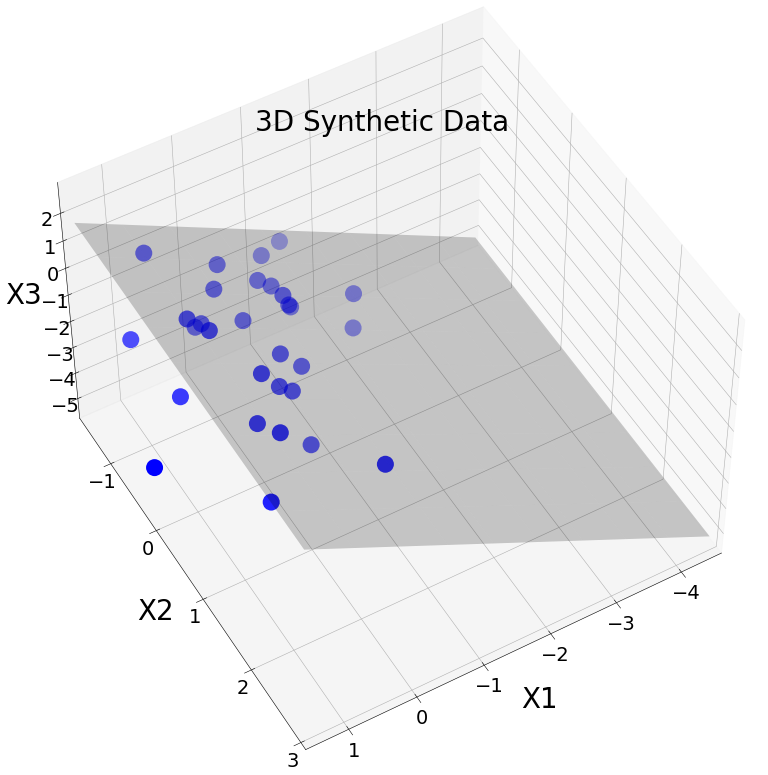

In [16]:
font = {'size'   : 28}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,20), dpi= 50,facecolor='w') 
ax = fig.gca(projection='3d') 

pnt3d=ax.scatter(Syn_Data[:,0], Syn_Data[:,1], Syn_Data[:,2], 
                 c='b',s=600,lw = 0)

ax.set_xlabel('X1',fontsize=40, labelpad =30.1)
ax.set_ylabel('X2',fontsize=40, labelpad =25.1)
ax.set_zlabel('X3',fontsize=40, labelpad =19.1)
ax.set_title('3D Synthetic Data ',fontsize=40, y=0.9)
plt.xlim(-4.5, 1.5)
plt.ylim(-1.6, 3)
ax.view_init(elev=50, azim=60)

# Add a surface to data
axes = [-4.5, 1.5, -1.6, 3, -2.0, 2.0]
x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)
pca = PCA(n_components = 2)
X2D = pca.fit_transform(Syn_Data)
C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])
ax.plot_surface(x1, x2, z, alpha=0.2, color="k")

plt.show()

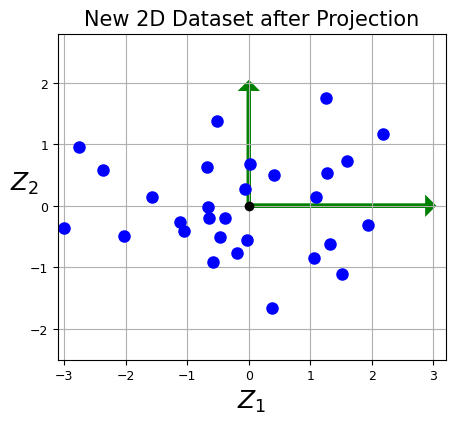

In [17]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(X2D[:, 0], X2D[:, 1], "bo", markersize=8)

ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 2, head_width=0.2, length_includes_head=True, linewidth=3,
         head_length=0.1, fc='k', ec='g')
ax.arrow(0, 0, 3, 0, head_width=0.2, length_includes_head=True, linewidth=3, 
         head_length=0.1, fc='k', ec='g')
ax.set_xlabel("$Z_1$", fontsize=18)
ax.set_ylabel("$Z_2$", fontsize=18, rotation=0)
plt.gca().set_aspect('1')
ax.set_title('New 2D Dataset after Projection',fontsize=15, y=1)
plt.xlim((-3.1, 3.2))
plt.ylim((-2.5, 2.8))
ax.grid(True)

### Variance Ratio of each Principal Component

The variance ratio of each principal component is very useful to understand how much variance we are losing by choosing a specific number of principal component. This can be done by the **explained_variance_ratio_** variable of Scikit-Learn. It calculates the ratio of the dataset’s variance belongs to each axis of principal component. For example for the previous data set, lets see after reducing dimension from 3D to 2D, how much variance is losing.

In [18]:
pca.explained_variance_ratio_

array([0.77086391, 0.18961096])

This explains that 77.08% of the dataset’s variance belongs to the first axis, and 18.96% belongs to the second axis. First and second principal components have 96.04% of of the dataset’s variance, so 3.96% variance is left for the third axis. Therefore, the third principal component has little information that can be remove from the data. This approach is very useful to choose the number of dimensions to reduce.

## PCA for Outlier (or Anomaly) Detection

For the previous 3D data set, we add 5 outliers and then apply PCA to reduce dimension from 3D to 2D.

In [19]:
from numpy import random

n=5
Outlier = np.zeros((n, 3))
for i in range(n):
    np.random.seed(30+i)
    a=random.randint(-3,-2)+random.rand()
    b=random.randint(2,3)+random.rand()
    c=random.randint(-1,1)+random.rand()    
    Outlier[i,0]=a; Outlier[i,1]=b; Outlier[i,2]=c

Concatenate outliers to the 3D data set.

In [20]:
Syn_Data_Outlier=np.concatenate((Syn_Data, Outlier), axis=0)

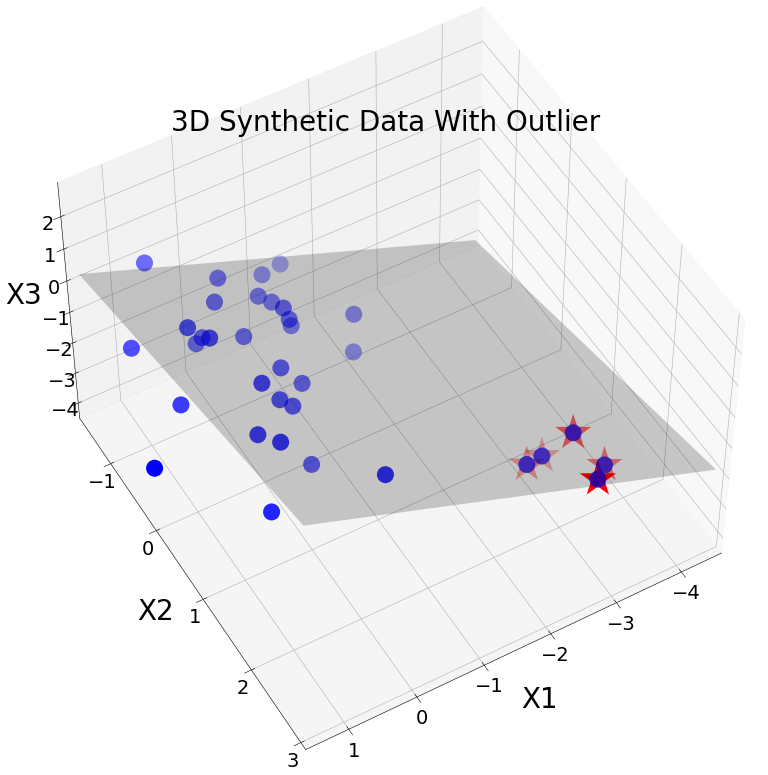

In [22]:
font = {'size'   : 28}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,20), dpi= 50,facecolor='w') 
ax = fig.gca(projection='3d') 

pnt3d=ax.scatter(Syn_Data_Outlier[:,0], Syn_Data_Outlier[:,1], Syn_Data_Outlier[:,2], 
                 c='b',s=600,lw = 0)

pnt3d=ax.scatter(Outlier[:,0], Outlier[:,1], Outlier[:,2], 
                 c='r',marker='*',s=3000,lw = 0)

ax.set_xlabel('X1',fontsize=40, labelpad =30.1)
ax.set_ylabel('X2',fontsize=40, labelpad =25.1)
ax.set_zlabel('X3',fontsize=40, labelpad =19.1)
ax.set_title('3D Synthetic Data With Outlier',fontsize=40, y=0.9)
plt.xlim(-4.5, 1.5)
plt.ylim(-1.6, 3)
ax.view_init(elev=50, azim=60)

# Add a surface to data
axes = [-4.5, 1.5, -1.6, 3, -2.0, 2.0]
x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)
pca = PCA(n_components = 2)
X2D = pca.fit_transform(Syn_Data_Outlier)
C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])
ax.plot_surface(x1, x2, z, alpha=0.2, color="k")

plt.show()

Now apply PCA on the data:

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2D = pca.fit_transform(Syn_Data_Outlier)

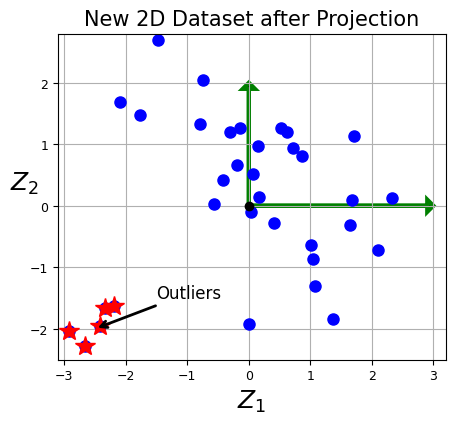

In [24]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(X2D[:, 0], X2D[:, 1], "bo", markersize=8)
ax.plot(X2D[-5:, 0], X2D[-5:, 1], "r*", markersize=15)

ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 2, head_width=0.2, length_includes_head=True, linewidth=3,
         head_length=0.1, fc='k', ec='g')
ax.arrow(0, 0, 3, 0, head_width=0.2, length_includes_head=True, linewidth=3, 
         head_length=0.1, fc='k', ec='g')
ax.set_xlabel("$Z_1$", fontsize=18)
ax.set_ylabel("$Z_2$", fontsize=18, rotation=0)
plt.annotate("Outliers", xy=(-2.5, -2), xytext=(-1.5, -1.5),
             arrowprops=dict(arrowstyle="->",linewidth=2), fontsize=12)
plt.gca().set_aspect('1')
ax.set_title('New 2D Dataset after Projection',fontsize=15, y=1)
plt.xlim((-3.1, 3.2))
plt.ylim((-2.5, 2.8))
ax.grid(True)

## PCA for Clustering 

PCA can also be applied for clustering of data. The following code generate a synthetic example with four features and 100 data set:

In [25]:
# Generate uncorrelated Gaussian model for 4 features
nvar=4; nsim=100
X=np.zeros((nsim,nvar))
mu=0; sigma=1
for i in range (nvar):
    Dist = np.random.normal(mu, sigma, nsim)
    X[:,i]=Dist

In [26]:
Num=30
cluster = np.zeros((Num,nvar))
for j in range (-2,1):       # Add clutser
    for i in range(Num):
        np.random.seed(30+i)
        a=-0.5+random.rand()+j
        b=0.75+random.rand()+j
        c=-2+random.rand()+j   
        d=1.5+random.rand() +j  
        cluster[i,0]=a; cluster[i,1]=b
        cluster[i,2]=c; cluster[i,1]=d
        X_cluster=np.concatenate((X, cluster), axis=0)

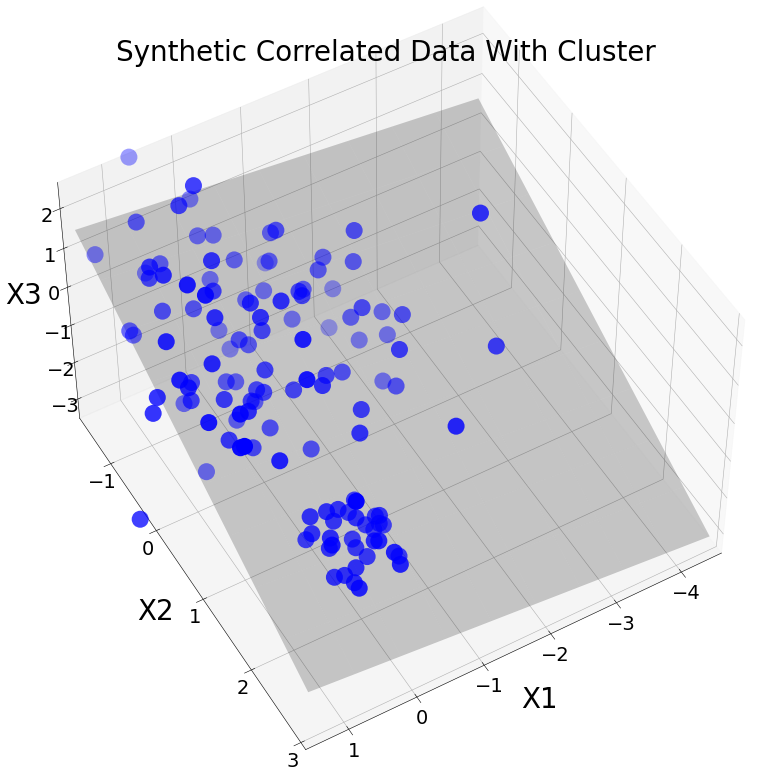

In [28]:
font = {'size'   : 28}
matplotlib.rc('font', **font)

fig = plt.figure(figsize=(20,20), dpi= 50,facecolor='w') 
ax = fig.gca(projection='3d') 

pnt3d=ax.scatter(X_cluster[:,0], X_cluster[:,1], X_cluster[:,2], c='b',s=600,lw = 0)
ax.set_xlabel('X1',fontsize=40, labelpad =30.1)
ax.set_ylabel('X2',fontsize=40, labelpad =25.1)
ax.set_zlabel('X3',fontsize=40, labelpad =19.1)
ax.set_title('Synthetic Correlated Data With Cluster',fontsize=40, y=1)
plt.xlim(-4.5, 1.5)
plt.ylim(-1.6, 3)
ax.view_init(elev=50, azim=60)

# Add a surface to data
axes = [-4.5, 1.5, -1.6, 3, -2.0, 2.0]
x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_cluster)
C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])
ax.plot_surface(x1, x2, z, alpha=0.2, color="k")

plt.show()

As it can be seen, the clusters can be clearly detected in the 3D data set. But, reducing dimensions from 3 to 2 using PCA, the cluster is clearly visible.

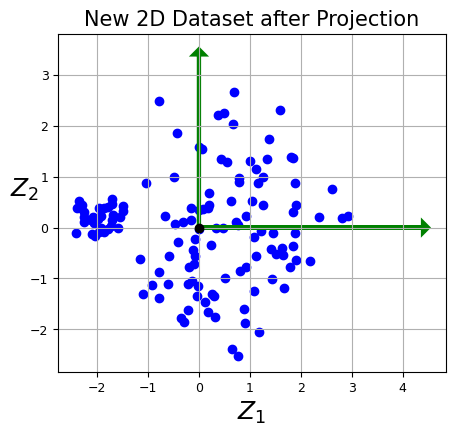

In [29]:
font = {'size'   : 9}
matplotlib.rc('font', **font)
fig, ax=plt.subplots(figsize=(5, 5), dpi= 100, facecolor='w', edgecolor='k')


ax.scatter(X2D[:, 0], X2D[:, 1], c='b', cmap='jet')

ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 3.5, head_width=0.2, length_includes_head=True, linewidth=3,
         head_length=0.1, fc='k', ec='g')
ax.arrow(0, 0, 4.5, 0, head_width=0.2, length_includes_head=True, linewidth=3, 
         head_length=0.1, fc='k', ec='g')
ax.set_xlabel("$Z_1$", fontsize=18)
ax.set_ylabel("$Z_2$", fontsize=18, rotation=0)
ax.set_title('New 2D Dataset after Projection',fontsize=15, y=1)
plt.gca().set_aspect('1')
ax.grid(True)

## Choose Number of Dimensions

The question is how we can select the right number of dimension. It seems arbitrary to reduce dimension of data to any dimension. In general, it is preferred to choose the number of dimensions that includes a sufficient portion of the variance (>95%): this dimensionality reduction is applied to improve computational cost. However, for data visualization that we saw above, the dimension will usually reduce to 2 or 3.

The following code calculates the minimum number of dimensions required to preserve 95% of the training set’s variance:

In [31]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

d is the dimension of data that can preserve more than 0.95% of variance. Then you can use d in PCA(n_components = d) and run PCA again. However, it is much better n_components to be a float between 0.0 and 1.0 indicating the ration of variance to preserve. If n_components is selected as integer, it indicates number of dimension:

In [24]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

# Clustering

**A simple example for clustering**. You find some unseen plants when you are in the mountains. The flowers may not be completely similar to each other, but you can simply understand they most likely belong to the same species. You need an expert to tell you the type or name of the plant; however, you absolutely do not need anyone to identify similar objects. For example, similar petal length, color, scent, petal width.. and so forth. This approach is called clustering. It first identifies similar instances and then assigns them to clusters. Clustering is can be used in several applications as below:


**Customer Segmentation**

You can cluster customers based on their activity on your website, their purchases, their returns and so on. This is really helpful to understand what your customers need and who they are, so you can make your products compatible to each segment.


**Dimensionality Reduction**

If we can fit the data into k clusters, this probably means that removing dimension to k can preserve enough information for further processing. So, clustering can be used as dimensionality reduction technique.


**Anomaly Detection (Outlier detection)**

Preventing fraud or detecting unusual credit card transactions and catching manufacturing defects. For example, if the users of your websites are clustered based on their behavior, the users with unusual behavior can be simply detected, such as weird number of requests per second, per day.. 


**Data Analysis**

It is usually useful to first discover clusters of similar instances when analyzing a new dataset: analyzing clusters separately is often easier.


**Semi-supervised Learning**

As we discussed before, semi-supervised technique can be applied if we have a few labels. Clustering can be performed first and the labels to all the instances in the same cluster can be propagated. By doing this, we can increase the number of labels available for a subsequent supervised learning algorithm. So, it can lead to improve the performance.


## K-Means 

First, we generate a synthetic unlabeled data with 5 blobs of instance as below:

In [32]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Assign center of each blob
centers = np.array(
    [[ 2.8,  3.5],
     [0.7 ,  3],
     [1.2,  4.8],])

# Assign some variance for each blob
blob_std = np.array([0.4, 0.4, 0.3])

# generate blobs with 3000 samples
X, y = make_blobs(n_samples=3000, centers=centers,cluster_std=blob_std, random_state=20)

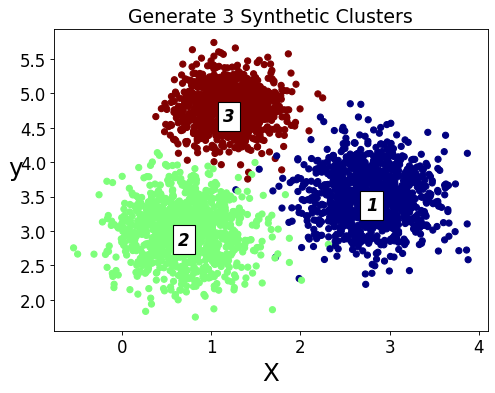

In [33]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='jet')
plt.xlabel('X', fontsize=22)
plt.ylabel('y', fontsize=22, rotation=0)
plt.title("Generate 3 Synthetic Clusters",fontsize=17)

for i in range(3):
    plt.text(centers[i][0], (centers[i][1]), str(i+1),fontsize=15,color='k', fontweight='bold',style='oblique', ha='center',
             va='top', wrap=True,bbox=dict(facecolor='w', alpha=1,pad=5)) 
    
plt.show()

The K-Means is a simple algorithm that can very quickly and efficiently perform clustering for this kind of dataset. The reliable clusters are often achieved in a few iteration. The following code shows implementation of KMeans in scikit-learn.

In [36]:
from sklearn.cluster import KMeans
N_clust= 3# number of clusters
KM = KMeans(n_clusters=N_clust)
pred = KM.fit_predict(X)

In [28]:
clust=KM.cluster_centers_
clust

array([[2.78597898, 3.50573562],
       [1.20796142, 4.79886868],
       [0.71085337, 2.98748856]])

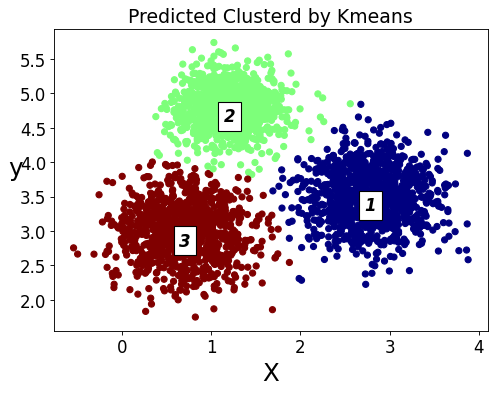

In [29]:
font = {'size'   : 15}
plt.rc('font', **font)
fig = plt.subplots(figsize=(7, 5), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(X[:, 0], X[:, 1], c=pred, s=30,cmap='jet')

for i in range(len(clust)):
    plt.text(clust[i][0], (clust[i][1]), str(i+1),fontsize=15,color='k', fontweight='bold',style='oblique', ha='center',
             va='top', wrap=True,bbox=dict(facecolor='w', alpha=1,pad=5)) 

plt.xlabel('X', fontsize=22)
plt.ylabel('y', fontsize=22, rotation=0)
plt.title("Predicted Clusterd by Kmeans",fontsize=17)
plt.show()

Kmeans greatly predicts three clusters of the synthetic data. Please notice the name of predicted clusters can be anything. It is only important to assign a cluster to a group of instances.

Kmeans is commonly used for clustering but there are other techniques as well:

## Spectral clustering

This algorithm takes a similarity matrix between the instances and creates a low-dimensional embedding from it (i.e., it reduces its dimensionality), then it uses another clustering algorithm in this low-dimensional space
(Scikit-Learn’s implementation uses K-Means). Spectral clustering can capture complex cluster structures, and it can also be used to cut graphs (e.g., to identify clusters of friends on a social network), **however it does not scale well to large number of instances, and it does not behave well when the clusters have very different sizes.**

In [1]:
#sc1 = SpectralClustering(n_clusters=4, assign_labels='discretize', random_state=42)
#sc1.fit(data)

## Agglomerative Clustering

A hierarchy of clusters is built from the bottom up. **Think of many tiny bubbles floating on water and gradually attaching to each other until there’s just one big group of bubbles.** Similarly, at each iteration agglomerative clustering **connects the nearest pair of clusters (starting with individual instances).** If you draw a tree with a branch for every pair of clusters that merged, you get a binary tree of clusters, where the leaves are the individual instances. **This approach scales very well to large numbers of instances or clusters,** it can capture clusters of various shapes, it produces a flexible and informative cluster tree instead of forcing you to choose a particular cluster scale, and it can be used with any pairwise distance. It can scale nicely to large numbers of instances if you provide a connectivity matrix. This is a sparse m by m matrix that indicates which pairs of instances are neighbors (e.g., returned by sklearn.neighbors.kneighbors_graph()). Without a connectivity matrix, the algorithm does not scale well to large datasets. 

In [20]:
#agg = AgglomerativeClustering(n_clusters=4,memory='joblib.Memory').fit(data_Min_Max)

## Gaussian Mixture Model

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from **a mixture of several Gaussian distributions whose parameters are unknown**. **All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid.** Each cluster can have a different **ellipsoidal shape, size, density and orientation**. When you observe an instance, you know it was generated from one of the Gaussian distributions, but you are not told which one, and you do not know what the parameters of
these distributions are.




(using Gaussian Mixture Model) – The key assumption in using this technique is that the data must follow a Gaussian distribution. The operating model is quite similar to the k-mean clustering technique wherein the number of clusters is randomized, and then the probability that each data point would be a part of the specific cluster is computed.

In [2]:
#gm = GaussianMixture(n_components=4, n_init=10, random_state=42)
#gm.fit(data)

## Optimum Number of Clusters 

All clustering techniques need to define number of cluster before applying clustering. There are two approaches of finding optimum number of clusters:

* Elbow rule

When the inertia drops very quickly but it reaches a number of cluster that decreases much more slowly. The curve has roughly the shape of an arm called “elbow”.

* Silhouette (si·luh·wet) coefficient

A more precise approach **(but also more computationally expensive)** is to use the silhouette score, which is the mean silhouette coefficient over all the instances. An instance’s silhouette coefficient is equal to **(b – a) / max(a, b)** where **a is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and b is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes b, excluding the instance’s own cluster).** The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters,
while a coefficient close to 0 means that it is close to a cluster boundary, and finally a
coefficient close to -1 means that the instance may have been assigned to the wrong
cluster. To compute the silhouette score, you can use Scikit-Learn’s silhou
ette_score() function,

See my [GitHub](https://github.com/MehdiRezvandehy/Clustering_Algorithms/blob/main/Clustering_Algorithms.ipynb) for more information about clustering algorithm.